In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow import keras
from keras.regularizers import l2
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
from keras import backend as K
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/electricity_price_data/Cleaned_Electricity_Price_Dataset.csv')

In [ ]:
merged_df

In [ ]:
merged_df.dtypes

,0
time,object
oil_price_euro,float64
coal_price_euro,float64
Stored_Energy_Value,float64
gas_price,float64
dxy_price,float64
Consumption,float64
Production,float64
precipitation,float64
load_no2,float64


In [ ]:
merged_df['time'] = pd.to_datetime(merged_df['time'])

In [ ]:
merged_df.dtypes

,0
time,datetime64[ns]
oil_price_euro,float64
coal_price_euro,float64
Stored_Energy_Value,float64
gas_price,float64
dxy_price,float64
Consumption,float64
Production,float64
precipitation,float64
load_no2,float64


In [ ]:
#extracting additional features from the time column
merged_df['hour'] = merged_df['time'].dt.hour
merged_df['day'] = merged_df['time'].dt.day
merged_df['day_of_week'] = merged_df['time'].dt.dayofweek
merged_df['month'] = merged_df['time'].dt.month
merged_df['year'] = merged_df['time'].dt.year
merged_df["week"] = merged_df["time"].dt.isocalendar().week
merged_df

,time,oil_price_euro,coal_price_euro,Stored_Energy_Value,gas_price,dxy_price,Consumption,Production,precipitation,load_no2,actual_price,wind_no2,temp_no2,system_price,hour,day,day_of_week,month,year,week
0,2017-10-23 00:00:00,49.099959,78.13098,29621000.0,18.09,93.94,13230.0,13058.0,0.0,3350.0,27.08,318.0,10.0,27.070000,0,23,0,10,2017,43
1,2017-10-23 01:00:00,49.099959,78.13098,29621000.0,18.09,93.94,13284.0,13016.0,0.0,3343.0,27.08,314.0,10.0,27.049999,1,23,0,10,2017,43
2,2017-10-23 02:00:00,49.099959,78.13098,29621000.0,18.09,93.94,13521.0,14065.0,0.0,3472.0,27.90,315.0,8.0,27.840000,2,23,0,10,2017,43
3,2017-10-23 03:00:00,49.099959,78.13098,29621000.0,18.09,93.94,14155.0,17185.0,0.0,3662.0,29.60,313.0,8.5,29.700001,3,23,0,10,2017,43
4,2017-10-23 04:00:00,49.099959,78.13098,29621000.0,18.09,93.94,15498.0,19971.0,0.0,3970.0,30.23,310.0,9.0,31.610001,4,23,0,10,2017,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54259,2023-12-31 19:00:00,70.387140,98.11980,23361204.0,32.35,101.38,20049.0,15691.0,0.0,5013.0,62.60,996.0,6.0,45.000000,19,31,6,12,2023,52
54260,2023-12-31 20:00:00,70.387140,98.11980,23361204.0,32.35,101.38,19641.0,15390.0,0.0,4870.0,62.25,1037.0,6.0,44.770000,20,31,6,12,2023,52
54261,2023-12-31 21:00:00,70.387140,98.11980,23361204.0,32.35,101.38,19156.0,15316.0,0.0,4693.0,61.77,1126.0,6.0,44.000000,21,31,6,12,2023,52
54262,2023-12-31 22:00:00,70.387140,98.11980,23361204.0,32.35,101.38,18785.0,14817.0,0.0,4649.0,59.31,1161.0,5.5,40.099998,22,31,6,12,2023,52


In [ ]:
# Creating cyclic features for the hour column
merged_df['hour_sin'] = np.sin(2 * np.pi * merged_df['hour'] / 24)
merged_df['hour_cos'] = np.cos(2 * np.pi * merged_df['hour'] / 24)

merged_df['month_sin'] = np.sin(2 * np.pi * merged_df['month'] / 12)
merged_df['month_cos'] = np.cos(2 * np.pi * merged_df['month'] / 12)

merged_df['day_of_week_sin'] = np.sin(2 * np.pi * merged_df['day_of_week'] / 7)
merged_df['day_of_week_cos'] = np.cos(2 * np.pi * merged_df['day_of_week'] / 7)

merged_df.drop(['hour', 'month', 'day_of_week'], axis=1, inplace=True)

In [ ]:
merged_df

,time,oil_price_euro,coal_price_euro,Stored_Energy_Value,gas_price,dxy_price,Consumption,Production,precipitation,load_no2,...,system_price,day,year,week,hour_sin,hour_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,2017-10-23 00:00:00,49.099959,78.13098,29621000.0,18.09,93.94,13230.0,13058.0,0.0,3350.0,...,27.070000,23,2017,43,0.000000,1.000000,-8.660254e-01,0.5,0.000000,1.00000
1,2017-10-23 01:00:00,49.099959,78.13098,29621000.0,18.09,93.94,13284.0,13016.0,0.0,3343.0,...,27.049999,23,2017,43,0.258819,0.965926,-8.660254e-01,0.5,0.000000,1.00000
2,2017-10-23 02:00:00,49.099959,78.13098,29621000.0,18.09,93.94,13521.0,14065.0,0.0,3472.0,...,27.840000,23,2017,43,0.500000,0.866025,-8.660254e-01,0.5,0.000000,1.00000
3,2017-10-23 03:00:00,49.099959,78.13098,29621000.0,18.09,93.94,14155.0,17185.0,0.0,3662.0,...,29.700001,23,2017,43,0.707107,0.707107,-8.660254e-01,0.5,0.000000,1.00000
4,2017-10-23 04:00:00,49.099959,78.13098,29621000.0,18.09,93.94,15498.0,19971.0,0.0,3970.0,...,31.610001,23,2017,43,0.866025,0.500000,-8.660254e-01,0.5,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54259,2023-12-31 19:00:00,70.387140,98.11980,23361204.0,32.35,101.38,20049.0,15691.0,0.0,5013.0,...,45.000000,31,2023,52,-0.965926,0.258819,-2.449294e-16,1.0,-0.781831,0.62349
54260,2023-12-31 20:00:00,70.387140,98.11980,23361204.0,32.35,101.38,19641.0,15390.0,0.0,4870.0,...,44.770000,31,2023,52,-0.866025,0.500000,-2.449294e-16,1.0,-0.781831,0.62349
54261,2023-12-31 21:00:00,70.387140,98.11980,23361204.0,32.35,101.38,19156.0,15316.0,0.0,4693.0,...,44.000000,31,2023,52,-0.707107,0.707107,-2.449294e-16,1.0,-0.781831,0.62349
54262,2023-12-31 22:00:00,70.387140,98.11980,23361204.0,32.35,101.38,18785.0,14817.0,0.0,4649.0,...,40.099998,31,2023,52,-0.500000,0.866025,-2.449294e-16,1.0,-0.781831,0.62349


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54264 entries, 0 to 54263
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 54264 non-null  datetime64[ns]
 1   oil_price_euro       54264 non-null  float64       
 2   coal_price_euro      54264 non-null  float64       
 3   Stored_Energy_Value  54264 non-null  float64       
 4   gas_price            54264 non-null  float64       
 5   dxy_price            54264 non-null  float64       
 6   Consumption          54264 non-null  float64       
 7   Production           54264 non-null  float64       
 8   precipitation        54264 non-null  float64       
 9   load_no2             54264 non-null  float64       
 10  actual_price         54264 non-null  float64       
 11  wind_no2             54264 non-null  float64       
 12  temp_no2             54264 non-null  float64       
 13  system_price         54264 non-

In [ ]:
# lagged features for specific columns
lagged_features = ['oil_price_euro', 'coal_price_euro', 'gas_price', 'dxy_price', 'system_price',
                   'Stored_Energy_Value', 'Consumption', 'Production', 'precipitation']
lag_periods = [1,3,24]

for feature in lagged_features:
    for lag in lag_periods:
        merged_df[f'{feature}_lag_{lag}'] = merged_df[feature].shift(lag)

merged_df = merged_df.dropna().reset_index(drop=True)

merged_df.head()

,time,oil_price_euro,coal_price_euro,Stored_Energy_Value,gas_price,dxy_price,Consumption,Production,precipitation,load_no2,...,Stored_Energy_Value_lag_24,Consumption_lag_1,Consumption_lag_3,Consumption_lag_24,Production_lag_1,Production_lag_3,Production_lag_24,precipitation_lag_1,precipitation_lag_3,precipitation_lag_24
0,2017-10-24 00:00:00,49.175568,78.51597,29621000.0,17.96,93.77,13985.0,17074.0,0.2,3544.0,...,29621000.0,14090.0,14939.0,13230.0,17531.0,18887.0,13058.0,0.1,0.0,0.0
1,2017-10-24 01:00:00,49.175568,78.51597,29621000.0,17.96,93.77,13994.0,16781.0,0.2,3534.0,...,29621000.0,13985.0,14324.0,13284.0,17074.0,17874.0,13016.0,0.2,0.0,0.0
2,2017-10-24 02:00:00,49.175568,78.51597,29621000.0,17.96,93.77,14005.0,16680.0,0.4,3583.0,...,29621000.0,13994.0,14090.0,13521.0,16781.0,17531.0,14065.0,0.2,0.1,0.0
3,2017-10-24 03:00:00,49.175568,78.51597,29621000.0,17.96,93.77,14493.0,17570.0,0.6,3690.0,...,29621000.0,14005.0,13985.0,14155.0,16680.0,17074.0,17185.0,0.4,0.2,0.0
4,2017-10-24 04:00:00,49.175568,78.51597,29621000.0,17.96,93.77,15797.0,19496.0,1.9,3979.0,...,29621000.0,14493.0,13994.0,15498.0,17570.0,16781.0,19971.0,0.6,0.2,0.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54240 entries, 0 to 54239
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        54240 non-null  datetime64[ns]
 1   oil_price_euro              54240 non-null  float64       
 2   coal_price_euro             54240 non-null  float64       
 3   Stored_Energy_Value         54240 non-null  float64       
 4   gas_price                   54240 non-null  float64       
 5   dxy_price                   54240 non-null  float64       
 6   Consumption                 54240 non-null  float64       
 7   Production                  54240 non-null  float64       
 8   precipitation               54240 non-null  float64       
 9   load_no2                    54240 non-null  float64       
 10  actual_price                54240 non-null  float64       
 11  wind_no2                    54240 non-null  float64   

In [ ]:
# Splitting the data
train_df = merged_df[merged_df['year'] < 2023]
test_df = merged_df[merged_df['year'] == 2023]

X_train, y_train = train_df.drop(columns=['actual_price', 'time'], axis=1), train_df['actual_price']
X_test, y_test = test_df.drop(columns=['actual_price', 'time'], axis=1), test_df['actual_price']

print(f"Train data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Train data size: (45480, 48)
Test data size: (8760, 48)


In [ ]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chossing K best features (K=10)
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Reshape selected training features
X_train_rnn = X_train_selected.reshape((X_train_selected.shape[0], 1, X_train_selected.shape[1]))
X_test_rnn = X_test_selected.reshape((X_test_selected.shape[0], 1, X_test_selected.shape[1]))


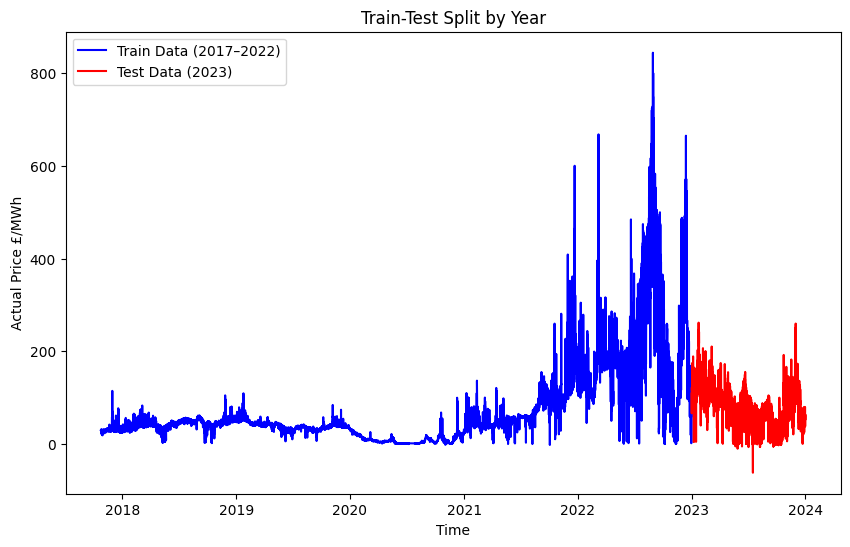

In [ ]:
# Plot the train and test data to visualize the split by year
plt.figure(figsize=(10, 6))
plt.plot(train_df['time'], train_df['actual_price'], label='Train Data (2017–2022)', color='blue')
plt.plot(test_df['time'], test_df['actual_price'], label='Test Data (2023)', color='red')
plt.title('Train-Test Split by Year')
plt.xlabel('Time')
plt.ylabel('Actual Price £/MWh')
plt.legend()
plt.show()


# ANN Model

In [ ]:

ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile and train the model
ann_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

ann_history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate
ann_train_loss = ann_model.evaluate(X_train_scaled, y_train, verbose=0)
ann_test_loss = ann_model.evaluate(X_test_scaled, y_test, verbose=0)

# Prediction
ann_predictions = ann_model.predict(X_test_scaled)

print(f'ANN Train Loss: {ann_train_loss:.4f}')
print(f'ANN Test Loss: {ann_test_loss:.4f}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3999.3003 - val_loss: 611.5715
Epoch 2/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 873.4983 - val_loss: 883.1716
Epoch 3/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 792.3154 - val_loss: 398.1408
Epoch 4/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 747.5812 - val_loss: 475.2045
Epoch 5/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 683.8130 - val_loss: 520.7365
Epoch 6/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 630.7657 - val_loss: 569.6949
Epoch 7/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 627.0511 - val_loss: 494.2296
Epoch 8/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 621.4634 - val_loss: 678.1459
Epoch 9/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 624.0912 - val_loss: 468.7288
Epoch 10/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 605.5590 - val_loss: 508.8925
Epoch 11/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 571.0452 - val_l

In [ ]:
ann_predictions_flat = np.squeeze(ann_predictions)

# Calculating MSE og RMSE
mse = mean_squared_error(y_test, ann_predictions_flat)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 19.95346500665495


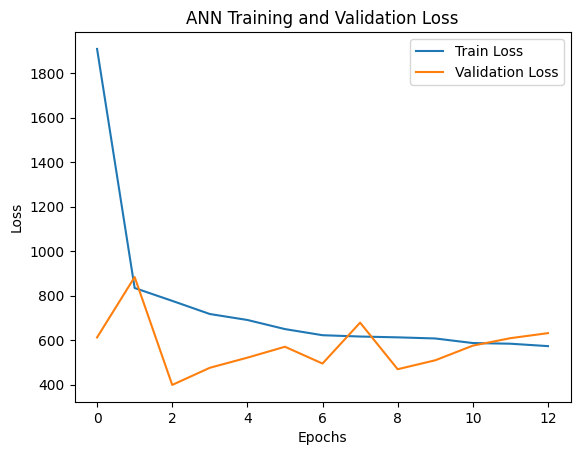

In [ ]:
#Plot the train and validation loss for the model over epochs
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Evaluating the model on test data and make predictions
ann_test_loss = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
ann_predictions = ann_model.predict(X_test_scaled)

# Calculating the metrics
mse = mean_squared_error(y_test, ann_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ann_predictions)
r2 = r2_score(y_test, ann_predictions)

# Converting actual and predicted values to binary using median as threshold
threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (ann_predictions.flatten() > threshold).astype(int)

# calculate precision, recall og accuracy
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"ANN Model Test Loss: {ann_test_loss:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"R² Score: {r2:.4f}")


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Model Test Loss: 398.1408
Root Mean Squared Error (RMSE): 19.9535
Mean Absolute Error (MAE): 15.3575
Precision: 0.9347
Recall: 0.7840
Accuracy: 0.8646
R² Score: 0.6976


In [ ]:
# comparing the actual and rpedicted prices in a new dataframe
comparison_df = pd.DataFrame({
    'Actual Price': y_test.to_numpy().ravel(),
    'ANN Model Predicted Price': ann_predictions.flatten()
})

comparison_df

,Actual Price,ANN Model Predicted Price
0,108.83,73.176796
1,102.39,69.985847
2,92.36,66.763580
3,82.66,63.483421
4,79.58,61.466549
...,...,...
8755,62.60,68.101852
8756,62.25,66.662964
8757,61.77,64.830528
8758,59.31,62.402996


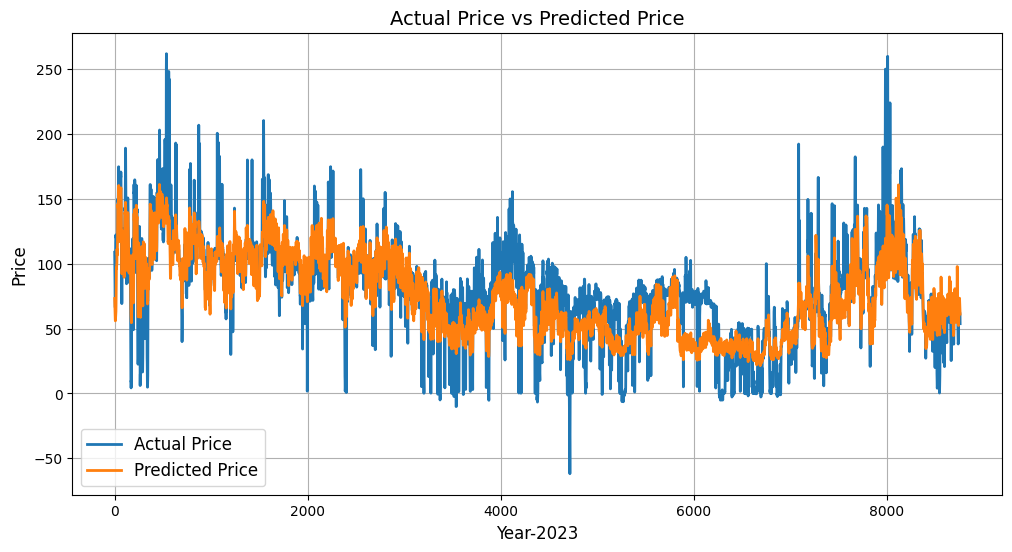

In [ ]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual Price'], label='Actual Price', linestyle='-', linewidth=2)
plt.plot(comparison_df['ANN Model Predicted Price'], label='Predicted Price', linestyle='-', linewidth=2)
plt.title('Actual Price vs Predicted Price', fontsize=14)
plt.xlabel('Year-2023', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# RNN Model

In [ ]:
rnn_model2 = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]),
              return_sequences=True, kernel_regularizer=l2(0.001)),Dropout(0.2),
    SimpleRNN(30, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001)),
    SimpleRNN(30, activation='relu', return_sequences=False, kernel_regularizer=l2(0.001)),
    Dense(1, kernel_regularizer=l2(0.001))
])

rnn_model2.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

rnn_history2 = rnn_model2.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping, model_checkpoint, reduce_lr],
verbose=2)

rnn_train_loss_2 = rnn_model2.evaluate(X_train_rnn, y_train, verbose=0)
rnn_test_loss_2 = rnn_model2.evaluate(X_test_rnn, y_test, verbose=0)

rnn_predictions2 = rnn_model2.predict(X_test_rnn)

print(f'RNN Train Loss: {rnn_train_loss_2:.4f}')
print(f'RNN Test Loss: {rnn_test_loss_2:.4f}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1422/1422 - 9s - 7ms/step - loss: 2115.7888 - val_loss: 711.5080 - learning_rate: 0.0010
Epoch 2/50
1422/1422 - 6s - 4ms/step - loss: 796.0594 - val_loss: 532.1744 - learning_rate: 0.0010
Epoch 3/50
1422/1422 - 5s - 4ms/step - loss: 755.8813 - val_loss: 598.7164 - learning_rate: 0.0010
Epoch 4/50
1422/1422 - 3s - 2ms/step - loss: 735.1969 - val_loss: 676.2019 - learning_rate: 0.0010
Epoch 5/50
1422/1422 - 4s - 2ms/step - loss: 710.6138 - val_loss: 686.7433 - learning_rate: 0.0010
Epoch 6/50
1422/1422 - 3s - 2ms/step - loss: 704.3611 - val_loss: 465.9497 - learning_rate: 0.0010
Epoch 7/50
1422/1422 - 3s - 2ms/step - loss: 702.2265 - val_loss: 551.1246 - learning_rate: 0.0010
Epoch 8/50
1422/1422 - 6s - 4ms/step - loss: 686.0850 - val_loss: 620.0845 - learning_rate: 0.0010
Epoch 9/50
1422/1422 - 5s - 4ms/step - loss: 693.5383 - val_loss: 578.7331 - learning_rate: 0.0010
Epoch 10/50
1422/1422 - 4s - 3ms/step - loss: 679.8527 - val_loss: 709.5766 - learning_rate: 0.0010
Epoch 11/50
1422/14

In [ ]:
rnn_predictions2_flat = np.squeeze(rnn_predictions2)
mse = mean_squared_error(y_test, rnn_predictions2_flat)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 21.57878153757319


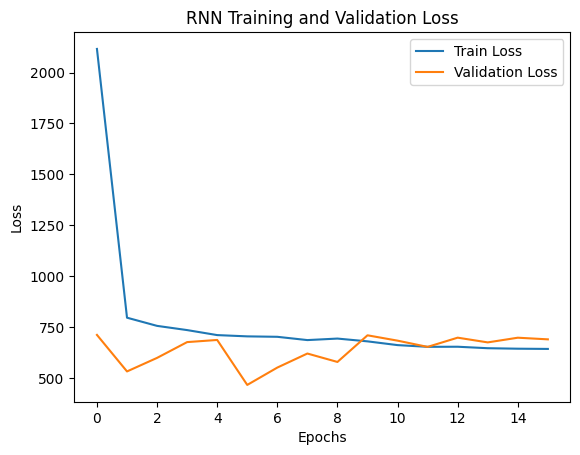

In [ ]:
plt.plot(rnn_history2.history['loss'], label='Train Loss')
plt.plot(rnn_history2.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
rnn_test_loss_2 = rnn_model2.evaluate(X_test_rnn, y_test, verbose=0)
rnn_predictions2 = rnn_model2.predict(X_test_rnn)

mse = mean_squared_error(y_test, rnn_predictions2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rnn_predictions2)
r2 = r2_score(y_test, rnn_predictions2)

threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (rnn_predictions2.flatten() > threshold).astype(int)

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)


print(f"RNN Model Test Loss: {rnn_test_loss_2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"R² Score: {r2:.4f}")


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RNN Model 2 Test Loss: 465.9497
Root Mean Squared Error (RMSE): 21.5788
Mean Absolute Error (MAE): 16.7967
Precision: 0.9359
Recall: 0.7132
Accuracy: 0.8322
R² Score: 0.6463


In [ ]:
comparison_df_2 = pd.DataFrame({
    'Actual Price': y_test.to_numpy().ravel(),
    'RNN Model2 Predicted Price': rnn_predictions2.flatten()
})

comparison_df

,Actual Price,RNN Model Predicted Price
0,108.83,76.467743
1,102.39,70.764938
2,92.36,65.392166
3,82.66,59.701641
4,79.58,50.800915
...,...,...
8755,62.60,44.735035
8756,62.25,43.988071
8757,61.77,43.720684
8758,59.31,42.483822


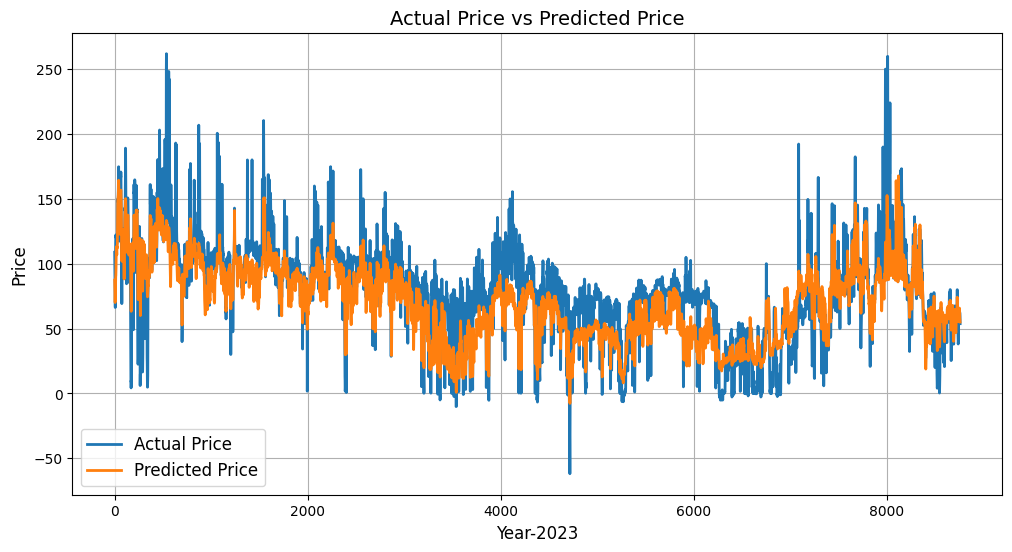

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(comparison_df_2['Actual Price'], label='Actual Price', linestyle='-', linewidth=2)
plt.plot(comparison_df_2['RNN Model2 Predicted Price'], label='Predicted Price', linestyle='-', linewidth=2)
plt.title('Actual Price vs Predicted Price', fontsize=14)
plt.xlabel('Year-2023', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# CNN Model

In [ ]:
# Reshaping data for the input
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print("X_train_cnn shape:", X_train_cnn.shape)
print("X_test_cnn shape:", X_test_cnn.shape)

X_train_cnn shape: (45480, 48, 1)
X_test_cnn shape: (8760, 48, 1)


In [ ]:
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2843/2843 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 2559.6882 - val_loss: 466.7926
Epoch 2/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 648.5867 - val_loss: 680.1063
Epoch 3/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 605.0360 - val_loss: 422.3370
Epoch 4/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 578.8998 - val_loss: 613.8825
Epoch 5/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 546.4800 - val_loss: 419.9161
Epoch 6/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 517.1672 - val_loss: 406.5957
Epoch 7/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 492.8488 - val_loss: 438.5161
Epoch 8/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 480.9458 - val_loss: 422.6102
Epoch 9/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 470.8739 - val_loss: 416.8361
Epoch 10/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 468.3478 - val_loss: 442.7075
Epoch 11/50
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 469.2

In [ ]:
cnn_train_loss = cnn_model.evaluate(X_train_cnn, y_train, verbose=0)
cnn_test_loss = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)

cnn_predictions = cnn_model.predict(X_test_cnn1)

print(f'CNN Train Loss: {cnn_train_loss:.4f}')
print(f'CNN Test Loss: {cnn_test_loss:.4f}')


mse = mean_squared_error(y_test, cnn_predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)



274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN Train Loss: 375.1560
CNN Test Loss: 406.5957
Root Mean Squared Error (RMSE): 20.16421873624562


In [ ]:
cnn_test_loss= cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
cnn_predictions = cnn_model.predict(X_test_cnn)

mse = mean_squared_error(y_test, cnn_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, cnn_predictions)
r2 = r2_score(y_test, cnn_predictions)

threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
cnn_pred_binary = (cnn_predictions.flatten() > threshold).astype(int)

precision = precision_score(y_test_binary, cnn_pred_binary)
recall = recall_score(y_test_binary, cnn_pred_binary)
accuracy = accuracy_score(y_test_binary, cnn_pred_binary)

print(f"CNN Test Loss: {cnn_test_loss:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN Test Loss: 406.5957
Root Mean Squared Error (RMSE): 20.1642
Mean Absolute Error (MAE): 14.7270
R² Score: 0.6911
Precision: 0.8830
Recall: 0.8548
Accuracy: 0.8708


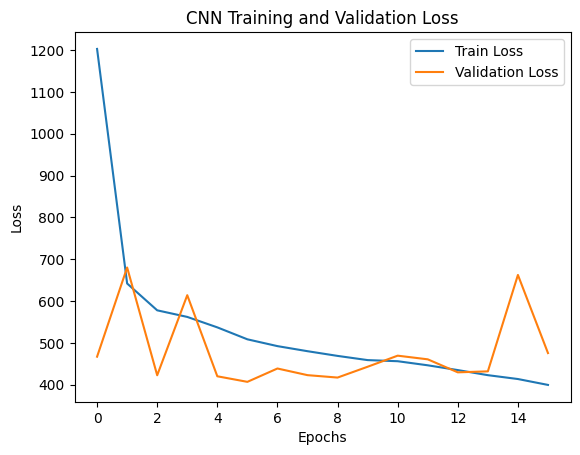

In [ ]:
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    'Actual Price': y_test.to_numpy().ravel(),
    'CNN Model Predicted Price': cnn_predictions.flatten()
})

comparison_df

,Actual Price,CNN Model Predicted Price
0,108.83,66.124725
1,102.39,62.109634
2,92.36,58.400696
3,82.66,55.260796
4,79.58,54.689251
...,...,...
8755,62.60,77.280266
8756,62.25,76.113197
8757,61.77,74.550407
8758,59.31,72.066574


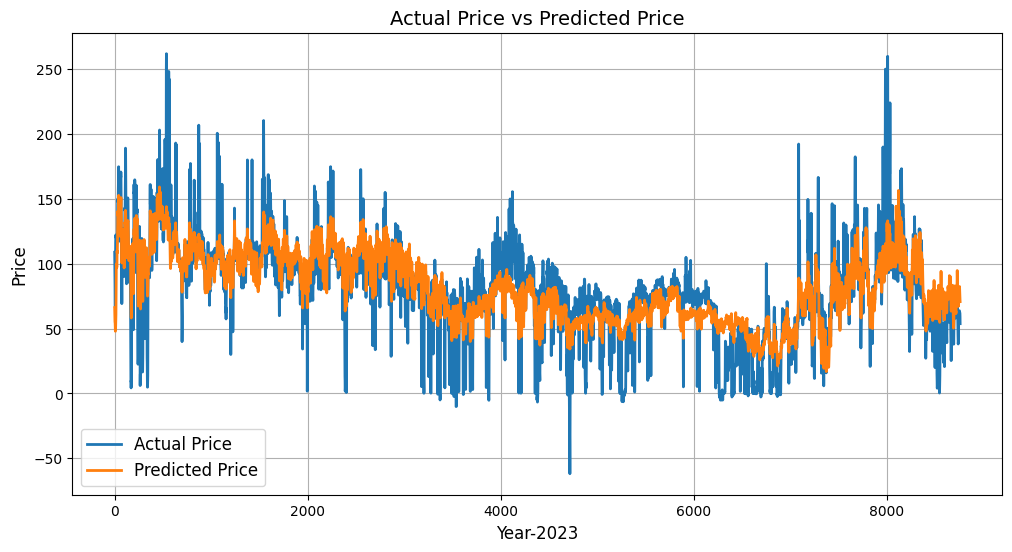

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual Price'], label='Actual Price', linestyle='-', linewidth=2)
plt.plot(comparison_df['CNN Model Predicted Price'], label='Predicted Price', linestyle='-', linewidth=2)
plt.title('Actual Price vs Predicted Price', fontsize=14)
plt.xlabel('Year-2023', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# LSTM Model

In [ ]:
timesteps = 24
y_train_trimmed = y_train.iloc[timesteps:].values
y_test_trimmed = y_test.iloc[timesteps:].values

print(f"Shape of X_train_rnn: {X_train_rnn.shape}")
print(f"Shape of y_train_trimmed: {y_train_trimmed.shape}")
print(f"Shape of X_test_rnn: {X_test_rnn.shape}")
print(f"Shape of y_test_trimmed: {y_test_trimmed.shape}")


Shape of X_train_rnn: (45456, 24, 48)
Shape of y_train_trimmed: (45456,)
Shape of X_test_rnn: (8736, 24, 48)
Shape of y_test_trimmed: (8736,)


In [ ]:
lstm_model2 = Sequential([
    LSTM(100, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=False),
    Dense(200, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(1)
])

lstm_model2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_history2 = lstm_model2.fit(
    X_train_rnn, y_train_trimmed,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_rnn, y_test_trimmed),
    verbose=2,
    callbacks=[early_stopping]
)

lstm_train_loss2 = lstm_model2.evaluate(X_train_rnn, y_train_trimmed, verbose=0)
lstm_test_loss2 = lstm_model2.evaluate(X_test_rnn, y_test_trimmed, verbose=0)

print(f'LSTM Train Loss: {lstm_train_loss2:.4f}')
print(f'LSTM Test Loss: {lstm_test_loss2:.4f}')

Epoch 1/100
2841/2841 - 48s - 17ms/step - loss: 1673.9425 - val_loss: 659.3973
Epoch 2/100
2841/2841 - 39s - 14ms/step - loss: 523.5596 - val_loss: 556.7211
Epoch 3/100
2841/2841 - 41s - 14ms/step - loss: 438.5417 - val_loss: 441.3668
Epoch 4/100
2841/2841 - 42s - 15ms/step - loss: 386.0247 - val_loss: 617.5729
Epoch 5/100
2841/2841 - 40s - 14ms/step - loss: 357.9356 - val_loss: 672.7742
Epoch 6/100
2841/2841 - 41s - 14ms/step - loss: 322.6848 - val_loss: 798.2325
Epoch 7/100
2841/2841 - 44s - 15ms/step - loss: 305.1330 - val_loss: 882.0863
Epoch 8/100
2841/2841 - 81s - 29ms/step - loss: 285.9148 - val_loss: 697.2765
Epoch 9/100
2841/2841 - 39s - 14ms/step - loss: 268.1107 - val_loss: 811.8113
Epoch 10/100
2841/2841 - 42s - 15ms/step - loss: 264.6628 - val_loss: 843.0671
Epoch 11/100
2841/2841 - 39s - 14ms/step - loss: 243.7922 - val_loss: 1032.8523
Epoch 12/100
2841/2841 - 41s - 14ms/step - loss: 233.3636 - val_loss: 1029.5100
Epoch 13/100
2841/2841 - 42s - 15ms/step - loss: 231.9529 

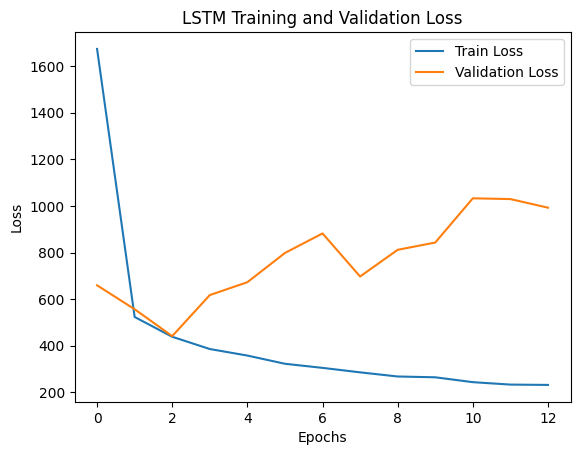

In [ ]:
plt.plot(lstm_history2.history['loss'], label='Train Loss')
plt.plot(lstm_history2.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
lstm_predictions = lstm_model2.predict(X_test_rnn)
lstm_predictions2_flat = np.squeeze(lstm_predictions)

mse = mean_squared_error(y_test_trimmed, lstm_predictions2_flat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_trimmed, lstm_predictions2_flat)
r2 = r2_score(y_test_trimmed, lstm_predictions2_flat)

threshold = np.median(y_test_trimmed)
y_test_binary = (y_test_trimmed > threshold).astype(int)
lstm_pred_binary = (lstm_predictions2_flat > threshold).astype(int)

precision = precision_score(y_test_binary, lstm_pred_binary)
recall = recall_score(y_test_binary, lstm_pred_binary)
accuracy = accuracy_score(y_test_binary, lstm_pred_binary)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Root Mean Squared Error (RMSE): 20.8139
Mean Absolute Error (MAE): 16.2172
R² Score: 0.6711
Precision: 0.9016
Recall: 0.7809
Accuracy: 0.8479


In [ ]:
comparison_df = pd.DataFrame({
    'Actual Price': y_test_trimmed,
    'LSTM Model Predicted Price': lstm_predictions2_flat
})

comparison_df

,Actual Price,LSTM Model Predicted Price
0,119.19,100.715439
1,118.18,103.594749
2,118.11,102.295174
3,119.99,102.744164
4,117.74,103.817406
...,...,...
8731,62.60,71.635582
8732,62.25,68.539398
8733,61.77,67.798119
8734,59.31,67.285980


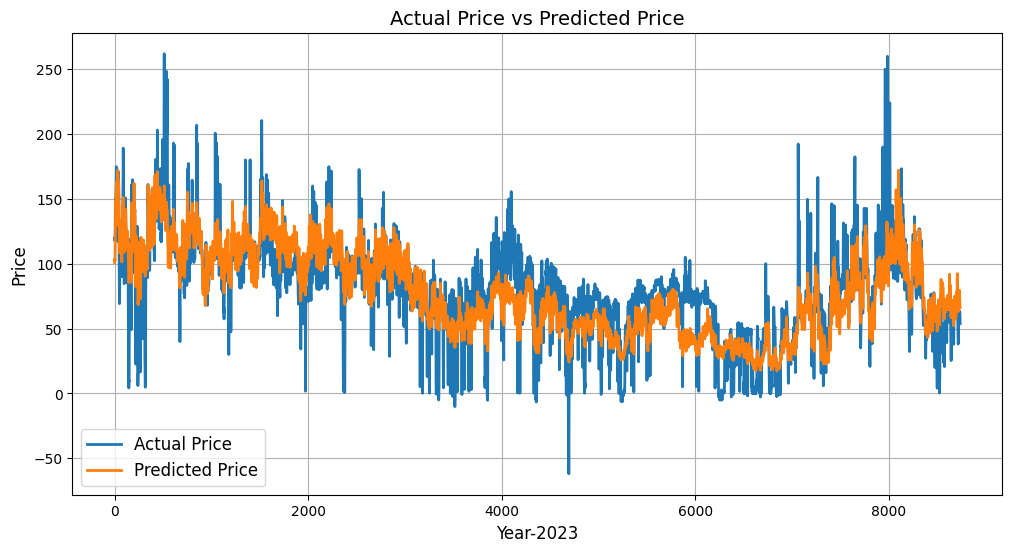

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual Price'], label='Actual Price', linestyle='-', linewidth=2)
plt.plot(comparison_df['LSTM Model Predicted Price'], label='Predicted Price', linestyle='-', linewidth=2)
plt.title('Actual Price vs Predicted Price', fontsize=14)
plt.xlabel('Year-2023', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()